# Networks: Friends, Epidemics & Terrorists
## Network Science: An Example YouTube Study

The goal of this handout is to show you how the scraped YouTube networks can be analyzed using NetworkX. Please note that analysis and the interpretations in this handout can be improved. You should also create a professiona looking network plot through Gephi software.

In [39]:
# Make sure you run this code cell everytime you open the notebook!
import pandas as pd              # Import Pandas for its data manipulation and analysis functions
import networkx as nx            # Import NetworkX library as nx for its network functions
import numpy as np               # Import NumPy library as np for its mathematical functions
import matplotlib.pyplot as plt  # Import Matplotlib library as plt for its plotting functions
import matplotlib as mplt        # Import Matplotlib library as mplt for its plotting functions

## YouTube DATASET

This is the YouTube network I created using the data I collected from YouTube. We will use NetworkX package to analyze this network.

In [40]:
# Load the network generated from YouTube data
# UPLOAD THE FILE ON THE LEFT, AND RUN THE CODE BELOW 
# NOTE THAT THE DATA FILE WILL BE REMOVED FROM LEFT AFTER YOU CLOSE THE COLAB PAGE.

# youtube_example1.csv file links all recommended videos to the YouTube channel
# youtube_example2.csv file links all recommended videos to the featured video on the YouTube channel
# I WILL ANALYZE youtube_example2.csv FILE. YOU CAN ANALYZE BOTH NETWORKS SEPARATELY

# youtube = pd.read_csv('youtube_example1.csv', skiprows = 1, sep=',', names=['start_node', 'end_node','weight'])
youtube = pd.read_csv('youtube_example2.csv', skiprows = 1, sep=',', names=['start_node', 'end_node','weight'])
youtube

MDG=nx.MultiDiGraph()
for idx, row in youtube.iterrows():
    start_node, end_node, weight = [str(i) for i in row]
    MDG.add_weighted_edges_from([(start_node,end_node, float(weight))]) # 
DG=nx.DiGraph()

for u,v,data in MDG.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if DG.has_edge(u,v):
        DG[u][v]['weight'] += w
    else:
        DG.add_edge(u, v, weight=w)
# print(nx.get_edge_attributes(DG, 'weight'))

##  PLOT IN NETWORKX

The code below creates a plot of this network in NetworkX. However, you should create a professional looking network plot using Gephi. Your network should provide a visual representation of your key findings for this network as much as possible.

The plot of the weighted network: 



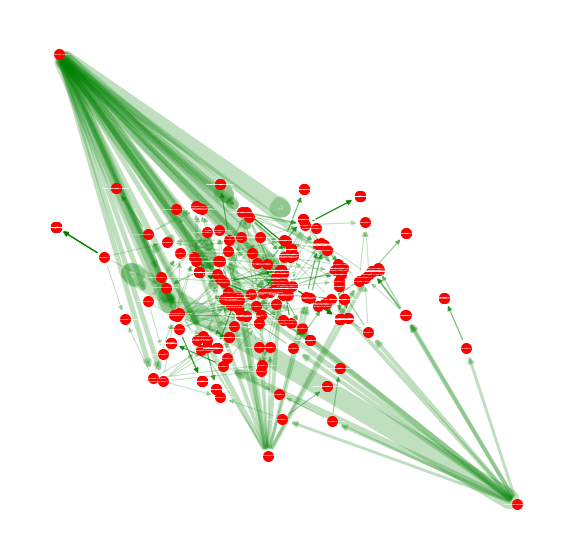

In [41]:
print("The plot of the weighted network: \n")    

widths = nx.get_edge_attributes(DG, 'weight')   # Set the width of links as the weights
nodelist = DG.nodes()                           # List of nodes
plt.figure(figsize=(10,10))                       # Set the figue size   
pos = nx.kamada_kawai_layout(DG)                       # Set the position os the nodes

# Plot the nodes
nx.draw_networkx_nodes(DG,pos, nodelist=nodelist, node_size=100, node_color='red', alpha=1)

# Plot the edges
nx.draw_networkx_edges(DG, pos, edgelist = widths.keys(), width=list(widths.values()), edge_color='green', alpha=0.25)

# Plot the labels
nx.draw_networkx_labels(DG, pos=pos, font_size=1, font_weight='bold', labels=dict(zip(nodelist,nodelist)), font_color='white')
plt.box(False)
plt.show()

In [42]:
# Directed Unweighted Network Analysis
# Here we are ignoring the weights in the network
print("Total number of nodes (N): ", DG.number_of_nodes())                 # Print the number of nodes (N) 
print("Total number of links (L): ", DG.to_undirected().number_of_edges()) # Print the number of links (L)
print("Average Degree (<k>): ", DG.number_of_edges()/DG.number_of_nodes()) # Average degree (<k>) = L / N

WCC = max(nx.weakly_connected_components(DG), key=len)                     # Maximum weakly connected component
G0 = DG.subgraph(WCC)                                                      
print("Size of the giant component(S): ", G0.number_of_nodes()/DG.number_of_nodes()) # Giant Component Size     
print("The average path length of the undirected version of the same network (l): ", nx.average_shortest_path_length(G0.to_undirected(), method='dijkstra'))   # Average Path Length 
print("Average clustering coefficient (CWS): ", nx.average_clustering(G0))           # Average local clustering coefficient
print("Assortativity based on degree (r) :", nx.degree_assortativity_coefficient(G0,x='out',y='in')) # Print assortativity based on degree

Total number of nodes (N):  253
Total number of links (L):  384
Average Degree (<k>):  1.517786561264822
Size of the giant component(S):  1.0
The average path length of the undirected version of the same network (l):  4.462481962481962
Average clustering coefficient (CWS):  0.024779361172186907
Assortativity based on degree (r) : 0.04047770454235179


***INTERPRETATION:*** 

The number of YouTube webpages we scraped is 253, and there are 384 links between these webpages. This results in a 1.52 (<k>) average degree for this directed network. And, this indicates that in average each node is connected to 1.52 nodes.

The size of the giant component (S) is 1.0. This suggests that all the nodes in this network is weakly connected. 

The average path length of the directed network is not meaningful here, since the network is not strongly connected. However, undirected version of this network has an average path length of 4.46.

The average local clustering coefficient (CWS) is 0.025. This suggests that in average 2.5% of neighbors of a node link to each other. 

The assortativity based on degree is slightly positive (r=0.04) for this network. This suggests that high degree nodes tend to link with high degree nodes.

In [43]:
# Directed Weighted Network Analysis: Some Important Metrics Affected by Weight
my_dict= dict(DG.degree(weight='weight'))                                  # Finding the average degree for a weighted network
total = sum(my_dict.values())/2
print("Average Degree (<k>): ", total/DG.number_of_nodes()) # Average degree (<k>) = L / N

WCC = max(nx.weakly_connected_components(DG), key=len)                     # Maximum connected component
G0 = DG.subgraph(WCC)
print("Assortativity based on weighted degree (r) :", nx.degree_assortativity_coefficient(G0,x='out',y='in', weight='weight')) # Print assortativity based on degree

Average Degree (<k>):  2.608695652173913
Assortativity based on weighted degree (r) : 0.3817080296494271


***INTERPRETATION:*** 

The average weighted degree is 2.61. This indicates that in average we have 2.61 links in the weighted network. 

The assortativity based on weighted degree is 0.38. This indicates that nodes with high weighted degrees connect to the other nodes with high weighted degrees.

## Network Analysis: Centrality

In this netwrok, the centrality scores assigned to a particular YouTube video can be useful in determining the significance of this video.
First, lets find the centrality of all of the nodes in the network, and then interpret our findings.

In [34]:
centralities=nx.degree_centrality(DG)        # Five nodes with the highest degree centrality values.
print('Top 5 Degree Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:5])) 

centralities=nx.in_degree_centrality(DG)     # Five nodes with the highest indegree centrality values.
print('Top 5 InDegree Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:5])) 

centralities=nx.out_degree_centrality(DG)    #  Five nodes with the highest outdegree centrality values.
print('Top 5 OutDegree Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:5])) 

centralities=nx.pagerank(DG)                 # Five nodes with the highest pagerank centrality values. 
print('Top 5 PageRank Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:5]))

Top 5 Degree Centrality Scores: {'https://www.youtube.com/user/CNN/videos': 0.10714285714285714, 'https://www.youtube.com/watch?v=_xdo7u7KoGg': 0.09523809523809523, 'https://www.youtube.com/watch?v=wAh5h4rq71Y': 0.0873015873015873, 'https://www.youtube.com/watch?v=9P7_00M3Vho': 0.08333333333333333, 'https://www.youtube.com/watch?v=U7ruc2nrTHI': 0.08333333333333333}
Top 5 InDegree Centrality Scores: {'https://www.youtube.com/watch?v=juqBLGmCHkU': 0.031746031746031744, 'https://www.youtube.com/watch?v=sLLX8cKCys0': 0.027777777777777776, 'https://www.youtube.com/watch?v=Wf2ZlHywkr4': 0.023809523809523808, 'https://www.youtube.com/watch?v=ksJUZa6jFpM': 0.023809523809523808, 'https://www.youtube.com/watch?v=_xdo7u7KoGg': 0.023809523809523808}
Top 5 OutDegree Centrality Scores: {'https://www.youtube.com/user/CNN/videos': 0.10714285714285714, 'https://www.youtube.com/watch?v=9P7_00M3Vho': 0.07936507936507936, 'https://www.youtube.com/watch?v=_xdo7u7KoGg': 0.07142857142857142, 'https://www.you

***INTERPRETATION:*** 

Based on the degree centrality CNN YouTube channel is the most central node. This makes sense (or it does not make sense) since ... Please analyze the other important nodes similarly.

Based on the indegree centrality PBS news hour video is the most central node. This makes sense (or it does not make sense) since ... Please analyze the other important nodes similarly.  

Based on the outdegree centrality CNN YouTube channel video is the most central node. This makes sense (or it does not make sense) since ... Please analyze the other important nodes similarly.  

Based on the PageRank centrality PBS news hour video is the most central node. This makes sense (or it does not make sense) since ... Please analyze the other important nodes similarly.  


In [38]:
my_dict= dict(DG.degree(weight='weight'))                            #  Five nodes with the highest degree centrality values.
total = sum(my_dict.values())
centralities = {key: value / total for key, value in my_dict.items()}
print('Top 5 Degree Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:5])) 

my_dict= dict(DG.in_degree(weight='weight'))                         #  Five nodes with the highest outdegree centrality values.
total = sum(my_dict.values())
centralities = {key: value / total for key, value in my_dict.items()}
print('Top 5 InDegree Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:5])) 

my_dict= dict(DG.out_degree(weight='weight'))                        #  Five nodes with the highest outdegree centrality values.
total = sum(my_dict.values())
centralities = {key: value / total for key, value in my_dict.items()}
print('Top 5 OutDegree Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:5])) 

centralities=nx.pagerank(DG, weight='weight')                 # Three students with the highest pagerank centrality values. 
print('Top 5 PageRank Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:5]))

Top 5 Degree Centrality Scores: {'https://www.youtube.com/user/CNN/videos': 0.1590909090909091, 'https://www.youtube.com/c/FoxNews/videos': 0.05454545454545454, 'https://www.youtube.com/c/TheYoungTurks/videos': 0.03636363636363636, 'https://www.youtube.com/watch?v=_xdo7u7KoGg': 0.03106060606060606, 'https://www.youtube.com/watch?v=9P7_00M3Vho': 0.030303030303030304}
Top 5 InDegree Centrality Scores: {'https://www.youtube.com/watch?v=_xdo7u7KoGg': 0.03484848484848485, 'https://www.youtube.com/watch?v=wAh5h4rq71Y': 0.031818181818181815, 'https://www.youtube.com/watch?v=9P7_00M3Vho': 0.030303030303030304, 'https://www.youtube.com/watch?v=U7ruc2nrTHI': 0.030303030303030304, 'https://www.youtube.com/watch?v=VtBHSP_CakI': 0.024242424242424242}
Top 5 OutDegree Centrality Scores: {'https://www.youtube.com/user/CNN/videos': 0.3181818181818182, 'https://www.youtube.com/c/FoxNews/videos': 0.10909090909090909, 'https://www.youtube.com/c/TheYoungTurks/videos': 0.07272727272727272, 'https://www.yout

***INTERPRETATION:*** 

Based on the degree centrality CNN YouTube channel is the most central node. This makes sense (or it does not make sense) since ... Please analyze the other important nodes similarly.

Based on the indegree centrality ***See how drone attacks in Ukraine are reshaping warfare video*** by Fareed Zakaria is the most central node. This makes sense (or it does not make sense) since ... Please analyze the other important nodes similarly.  

Based on the outdegree centrality CNN YouTube channel video is the most central node. This makes sense (or it does not make sense) since ... Please analyze the other important nodes similarly.  

Based on the PageRank centrality PBS news hour video is the most central node. This makes sense (or it does not make sense) since ... Please analyze the other important nodes similarly.  